In [1]:
# notebook to illustrate text indexing and basic search

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")

content_directory =  data_sets/recipes/txt/
text_filename_pattern =  ??.txt
self.documents populated =  22


In [5]:
# first clear index
tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


In [6]:
# merge document indices into a corpus index
tmt.index_search.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus word count index ...  data_sets/recipes/txt/index.wordcount


In [7]:
# create relevance index
tmt.index_search.calculate_relevance_index(cr.content_directory)

saving corpus relevance index ...  data_sets/recipes/txt/index.relevance


In [8]:
tmt.index_search.print_index(cr.content_directory)

wordcount_index_file  data_sets/recipes/txt/index.wordcount
       00.txt  01.txt   ...    20.txt  21.txt
1         0.0     0.0   ...       0.0     0.0
12        0.0     0.0   ...       0.0     1.0
14        0.0     0.0   ...       0.0     0.0
2         0.0     0.0   ...       0.0     0.0
3         0.0     0.0   ...       0.0     0.0
32        0.0     0.0   ...       0.0     0.0
4         0.0     0.0   ...       0.0     0.0
54        0.0     0.0   ...       0.0     0.0
a         2.0     4.0   ...       2.0     7.0
about     0.0     1.0   ...       0.0     0.0

[10 rows x 22 columns]
relevance_index_file  data_sets/recipes/txt/index.relevance
         00.txt    01.txt    ...       20.txt    21.txt
1      0.000000  0.000000    ...     0.000000  0.000000
12     0.000000  0.000000    ...     0.000000  0.002232
14     0.000000  0.000000    ...     0.000000  0.000000
2      0.000000  0.000000    ...     0.000000  0.000000
3      0.000000  0.000000    ...     0.000000  0.000000
32     0.00000

In [9]:
tmt.index_search.search_wordcount_index(cr.content_directory, "bread soaked in milk")

03.txt    12.0
17.txt    11.0
12.txt    11.0
08.txt    10.0
13.txt     7.0
00.txt     6.0
16.txt     6.0
20.txt     6.0
11.txt     5.0
04.txt     5.0
21.txt     5.0
14.txt     5.0
19.txt     5.0
02.txt     4.0
01.txt     4.0
15.txt     3.0
07.txt     3.0
18.txt     3.0
09.txt     2.0
06.txt     2.0
05.txt     2.0
10.txt     1.0
dtype: float64

In [10]:
tmt.index_search.search_relevance_index(cr.content_directory, "bread soaked in milk")

00.txt    0.021430
17.txt    0.010258
20.txt    0.010228
03.txt    0.008027
08.txt    0.006349
06.txt    0.005366
12.txt    0.005183
13.txt    0.005180
18.txt    0.005138
02.txt    0.004369
16.txt    0.004018
01.txt    0.003544
dtype: float64

In [11]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance[:20]

sauce       0.072480
them        0.070834
little      0.062832
rice        0.058276
butter      0.057279
bread       0.055933
they        0.054794
quantity    0.051914
together    0.050063
grated      0.048861
broth       0.048693
tomato      0.048444
boiled      0.047588
flour       0.047404
water       0.046393
then        0.046343
pepper      0.044368
some        0.044304
very        0.043971
that        0.043831
dtype: float64

In [12]:
# 20 least common
words_by_relevance[-20:]

heap    0.002419
than    0.002419
wet     0.002299
pie     0.002299
top     0.002299
your    0.002224
leaf    0.002224
32      0.002015
3       0.002004
2       0.002004
4       0.002004
1       0.002004
now     0.001799
bit     0.001799
had     0.001799
i       0.001282
up      0.001273
in      0.000000
and     0.000000
the     0.000000
dtype: float64

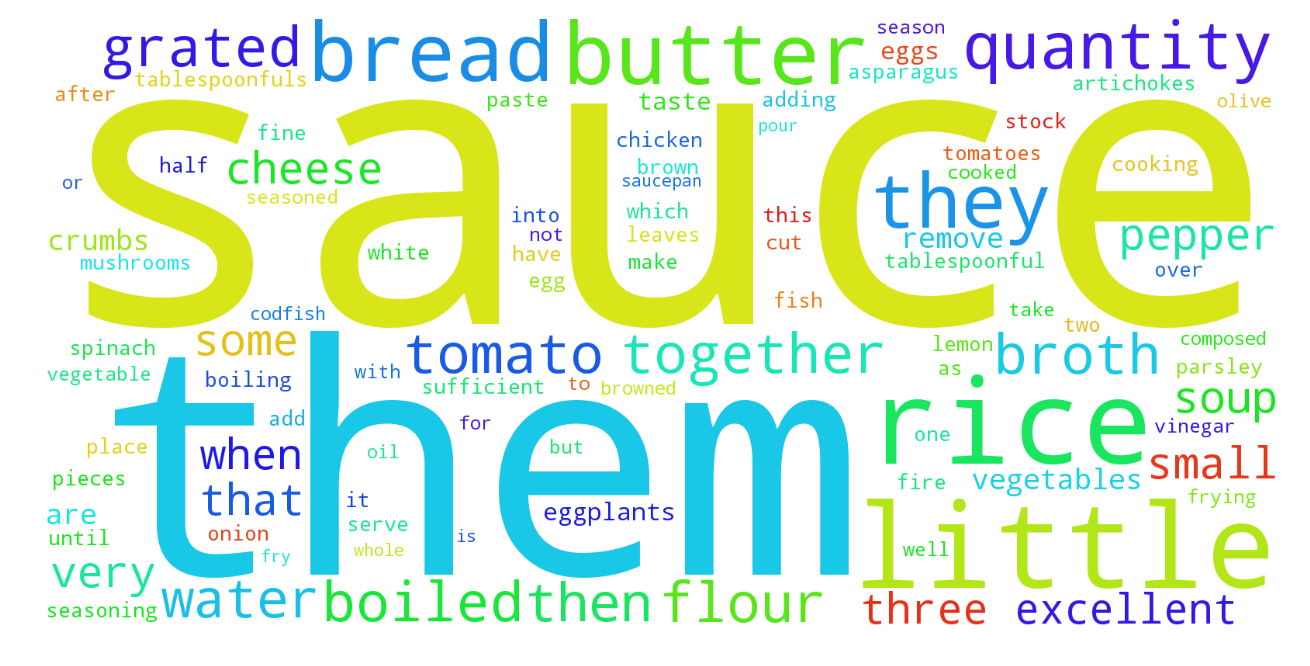

In [13]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)